# Dirichlet Conditions and Fourier Transforms

The Dirichlet conditions are a set of sufficient conditions for a function to be representable by a Fourier series at a point. These conditions are important for understanding when and how a function can be transformed into the frequency domain.

## Dirichlet Conditions:

### 1. Absolute Integrability
The function must be absolutely integrable over one period, meaning:
$$\int_{-T/2}^{T/2} |f(t)| dt < \infty$$

**Example:** A sine wave is absolutely integrable over any period, while a function that approaches infinity (like $1/t$ near $t=0$) may not be.

### 2. Finite Number of Discontinuities
The function can only have a finite number of points where it jumps from one value to another.

**Example:** A square wave has exactly two discontinuities per period (rising and falling edges), satisfying this condition. In contrast, functions like $\sin(1/t)$ near $t=0$ have infinitely many discontinuities in any interval containing zero.

### 3. Finite Number of Extrema
The function must have a finite number of maxima and minima within one period.

**Example:** A triangle wave has exactly one maximum and one minimum per period. Functions with infinite oscillations like $t\sin(1/t)$ near $t=0$ violate this condition.


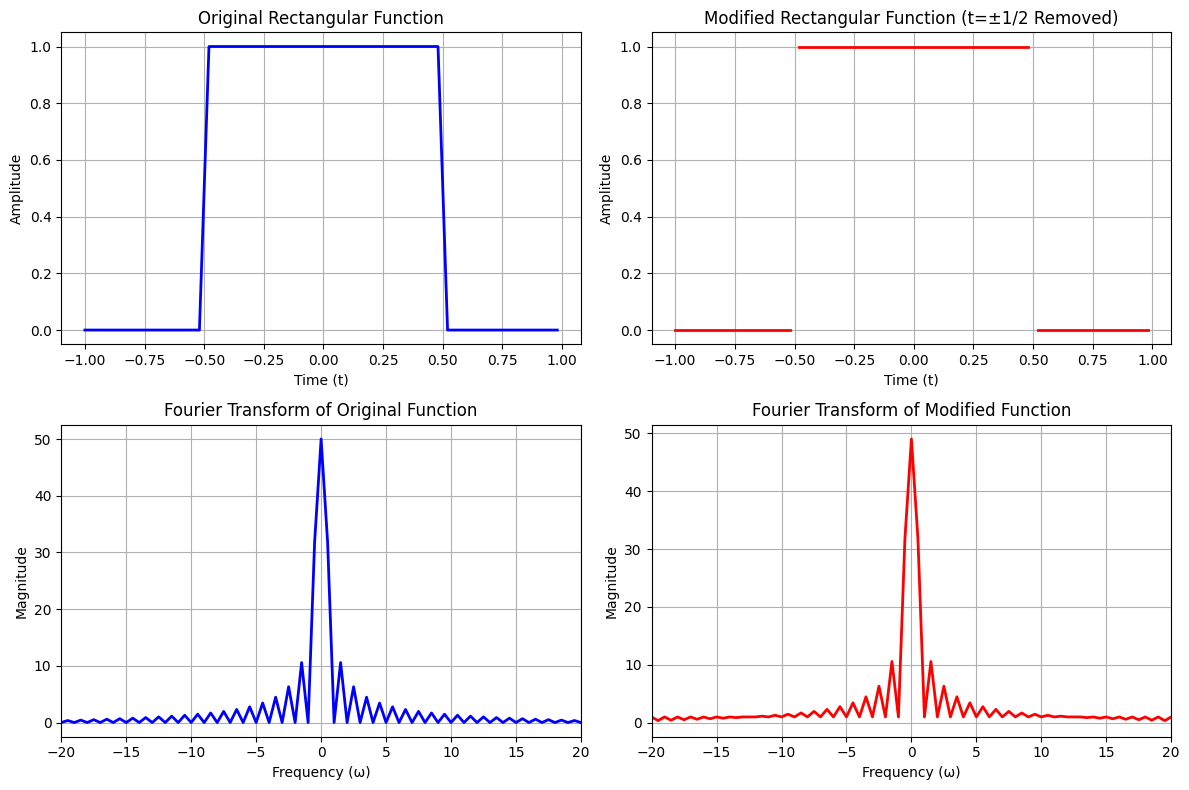

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, fftfreq

# Define the rectangular function
def rect(t, width=1):
    return np.where(np.abs(t) < width/2, 1, np.where(np.abs(t) == width/2, 0.5, 0))

def rect_removed(t, width=1):
    return np.where(np.abs(t) < width/2, 1, np.where(np.abs(t) == width/2, np.nan, 0))

# Time axis (Reduced number of points to enhance visibility of differences)
t = np.linspace(-1, 1, 100,endpoint=False)

# Compute rectangular functions
rect_original = rect(t, width=1)
rect_modified = rect_removed(t, width=1)

# Compute Fourier Transforms
N = len(t)
freqs = fftshift(fftfreq(N, d=t[1] - t[0]))  # Frequency axis
FT_original = fftshift(fft(rect_original))
FT_modified = fftshift(fft(np.nan_to_num(rect_modified)))  # Remove NaNs for FFT

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original function
axs[0, 0].plot(t, rect_original, 'b', linewidth=2)
axs[0, 0].set_title("Original Rectangular Function")
axs[0, 0].set_xlabel("Time (t)")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].grid()
freq_bounds=20
# Modified function
axs[0, 1].plot(t, rect_modified, 'r', linewidth=2)
axs[0, 1].set_title("Modified Rectangular Function (t=±1/2 Removed)")
axs[0, 1].set_xlabel("Time (t)")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].grid()

# Fourier Transform of Original Function
axs[1, 0].plot(freqs, np.abs(FT_original), 'b', linewidth=2)
axs[1, 0].set_xlim(-50, 50)  # Zoom in on frequency range
axs[1, 0].set_title("Fourier Transform of Original Function")
axs[1, 0].set_xlabel("Frequency (ω)")
axs[1, 0].set_ylabel("Magnitude")
axs[1, 0].set_xlim(-freq_bounds, freq_bounds)  # Apply frequency bounds

axs[1, 0].grid()

# Fourier Transform of Modified Function
axs[1, 1].plot(freqs, np.abs(FT_modified), 'r', linewidth=2)
axs[1, 1].set_xlim(-50, 50)  # Zoom in on frequency range
axs[1, 1].set_title("Fourier Transform of Modified Function")
axs[1, 1].set_xlabel("Frequency (ω)")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-freq_bounds, freq_bounds)  # Apply frequency bounds

axs[1, 1].grid()

plt.tight_layout()
plt.show()


### The Fourier transforms of the two rectangular functions look different because:

1. **Original Function**: The Fourier transform of the original rectangular function is a perfect sinc function (sin(x)/x). This is the expected result for a rectangular pulse in the time domain.

2. **Modified Function**: By removing the points at t=±1/2 (the edges of the rectangle), we've introduced a discontinuity in the function. This discontinuity causes higher frequency components to appear in the Fourier transform, resulting in slower decay of the spectrum and more pronounced side lobes.

The modification might seem minor (just removing two points), but it significantly affects the frequency content because it changes the fundamental mathematical properties of the function. The Gibbs phenomenon (ringing artifacts) becomes more pronounced in the modified function's transform due to these sharp discontinuities.
